# Question 3: Trajectory Evaluation and g2o

_Refer to the example notebooks for installation instructions_

# Evo

So you've implemented 2D SLAM, great! Now, what? We need a measure of how good the trajectory is. The error/loss used earlier doesn't tell us much about how the trajectory differs from the ground truth. Here, we try to do just this - compute error metrics. Rather than computing these from scratch, we will just Evo - https://github.com/MichaelGrupp/evo/.

Look at the absolute pose error (APE) and relative pose error (RPE). What do they capture and how are they calculated (descriptive answer)? How do these metrics differ in methodology? Can we determine if the error is more along the x/y axis?

Answer the above questions and report errors for the obtained trajectory.

```
! cp '../data/gt.txt' 'gt.g2o'
! python3 '../misc/g2o_to_kitti.py' 'gt.g2o' 'gt.kitti'
! cp ../data/opt.g2o .
! python3 '../misc/g2o_to_kitti.py' 'opt.g2o' 'opt.kitti'

## Run above commands in terminal if required
```

```
! evo_rpe kitti gt.kitti opt.kitti
! evo_ape kitti gt.kitti opt.kitti
```

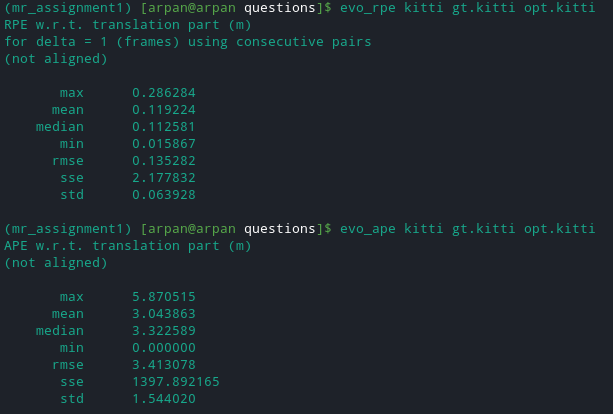

```
! evo_traj kitti gt.kitti opt.kitti -v --plot --plot_mode xy
```

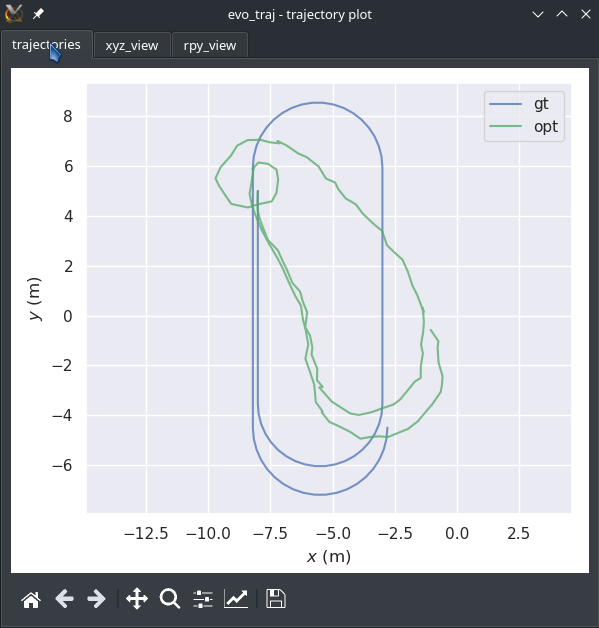

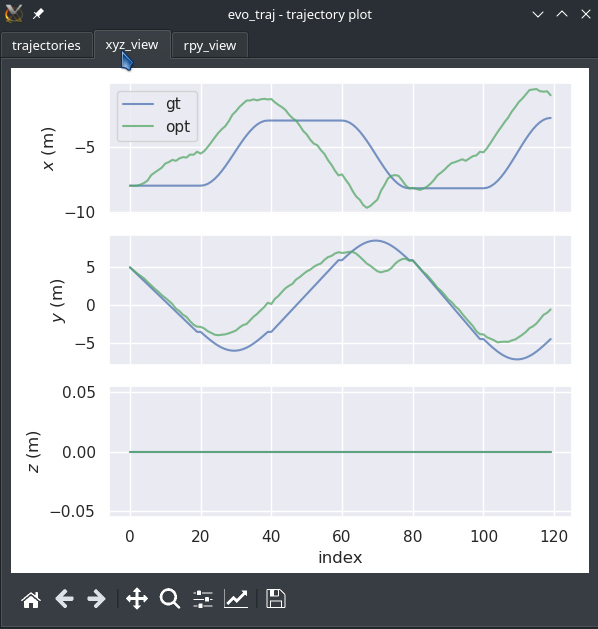

In Evo, Ablsolute Pose Error takes the frame by frame difference in the estimated and ground truth poses. This is simply implemented by summing/averaging over the error throughout all the frames. Relative Pose Error measures the difference between the transformations between the relative poses for predicted and ground truth poses. This can be implemented by averaging over the relative transformation difference for consecutive poses.

APE gives an overall estimate of the accuracy of predicted path of the robot by SLAM, while RPE gives an idea about the amount of drift experienced by the predicted path.

If we use `evo_traj` to analyse, a plot of error in x and y individually can be obtained. This will allow analyzing errors on each of the x/y axes individually along with their quantity. The source code can be potentially changed to output the correlation matrix, which will give us an idea babout which axis has higher error.

If you're interested, play around with this tool and add any other plots that you think might be relevant/interesting.

# g2o

Install g2o as mentioned in `examples/g2o.ipynb` and optimise `edges.txt`, the file you used earlier. Also use `g2o_viewer` and optimize `intel` (a trajectory in the Intel research lab) and `sphere`. They should look something like:


<table><tr>
<td> <img src="../misc/intel.jpg" alt="Drawing" style="width: 250px;"/> </td>
<td> <img src="../misc/sphere.jpg" alt="Drawing" style="width: 250px;"/> </td>
</tr></table>

Write briefly about your observations and try out few options in the GUI. What do they do, how do they perform?

#### Edges

1. Given poses
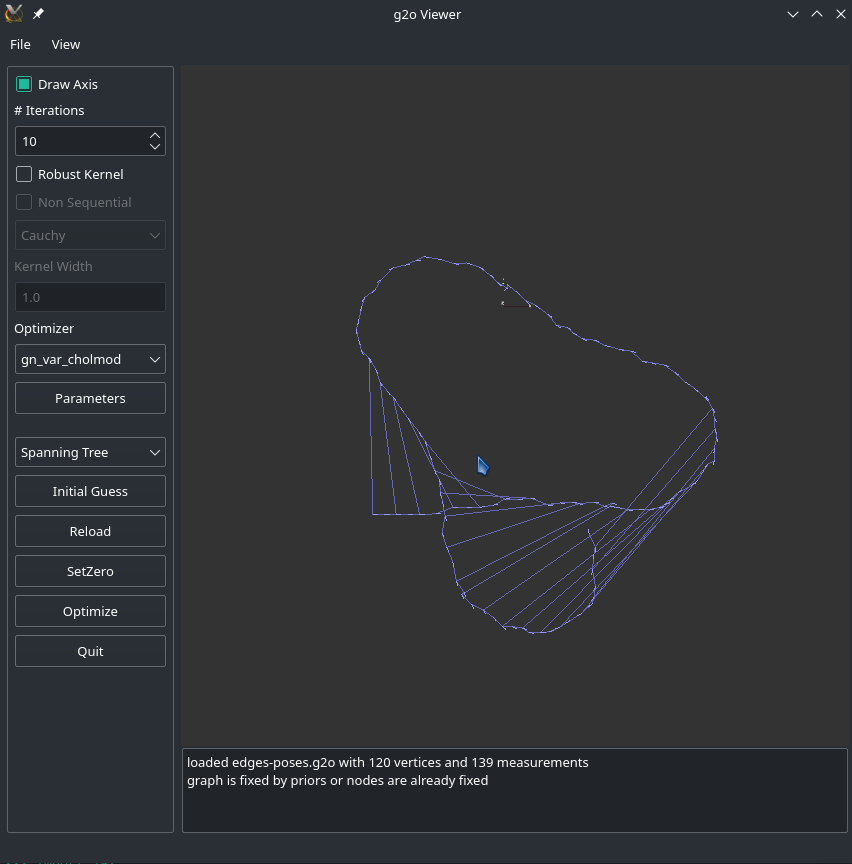

2. After initialization
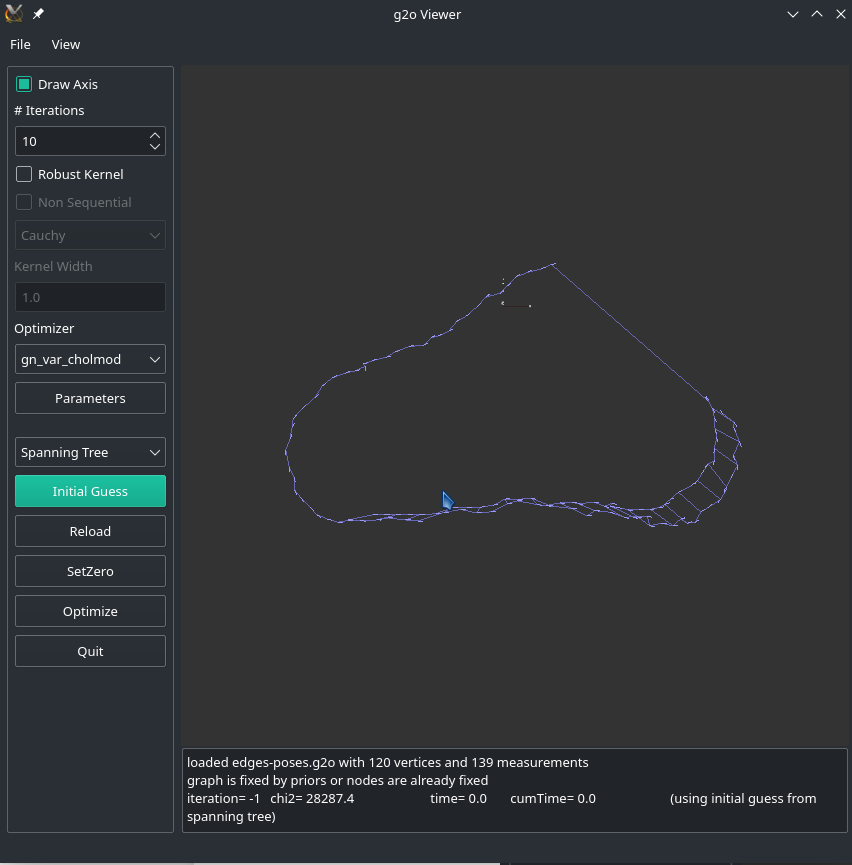

3. After optimizing with our code
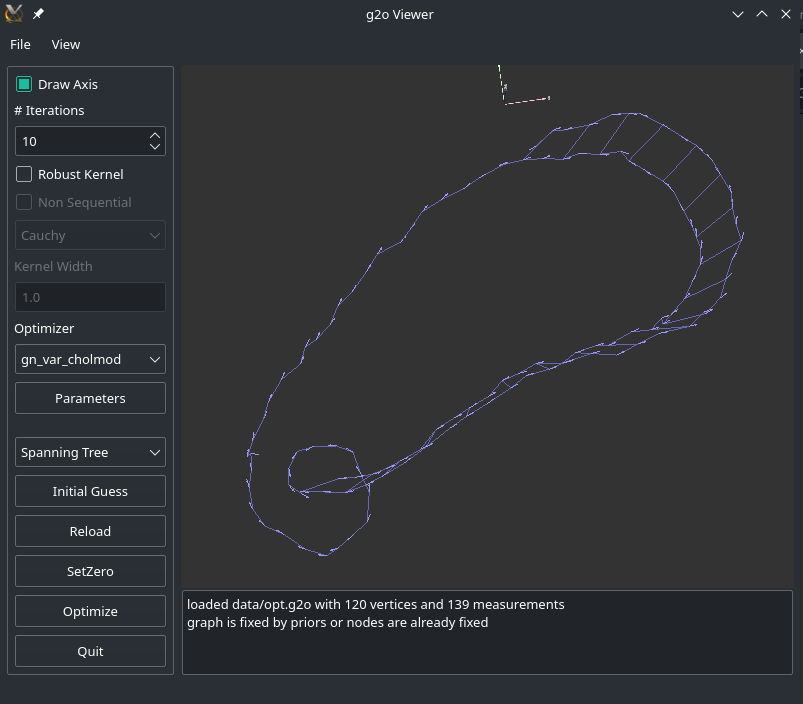

4. After optimizing with g2o using Gauss Newton Optimizer in 10 iterations
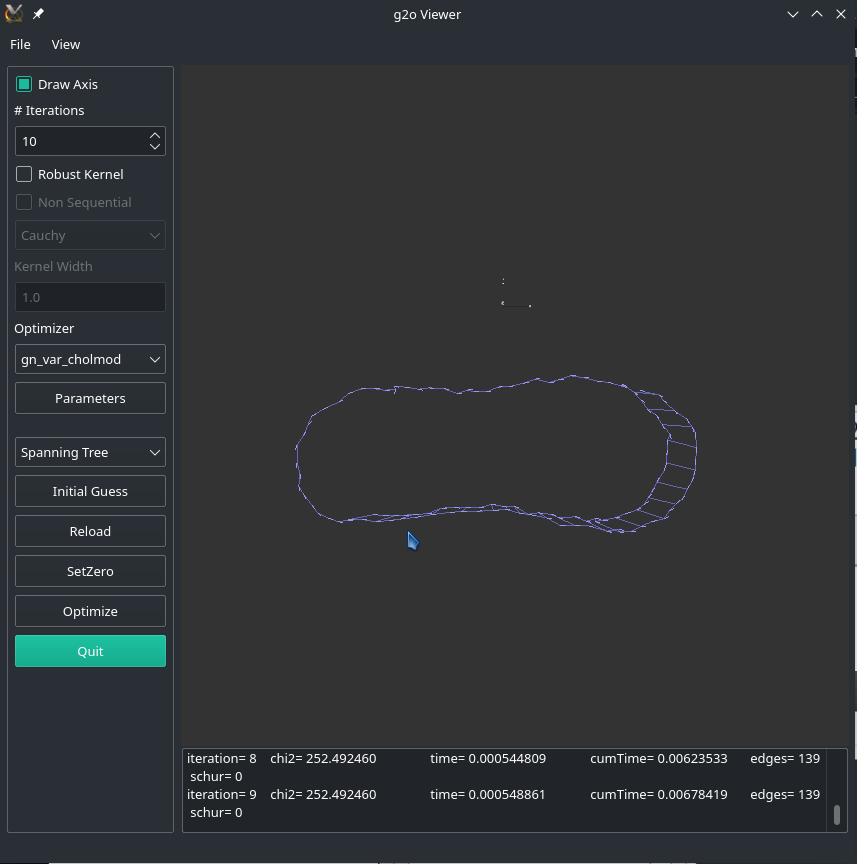

#### Intel

1. Given Poses

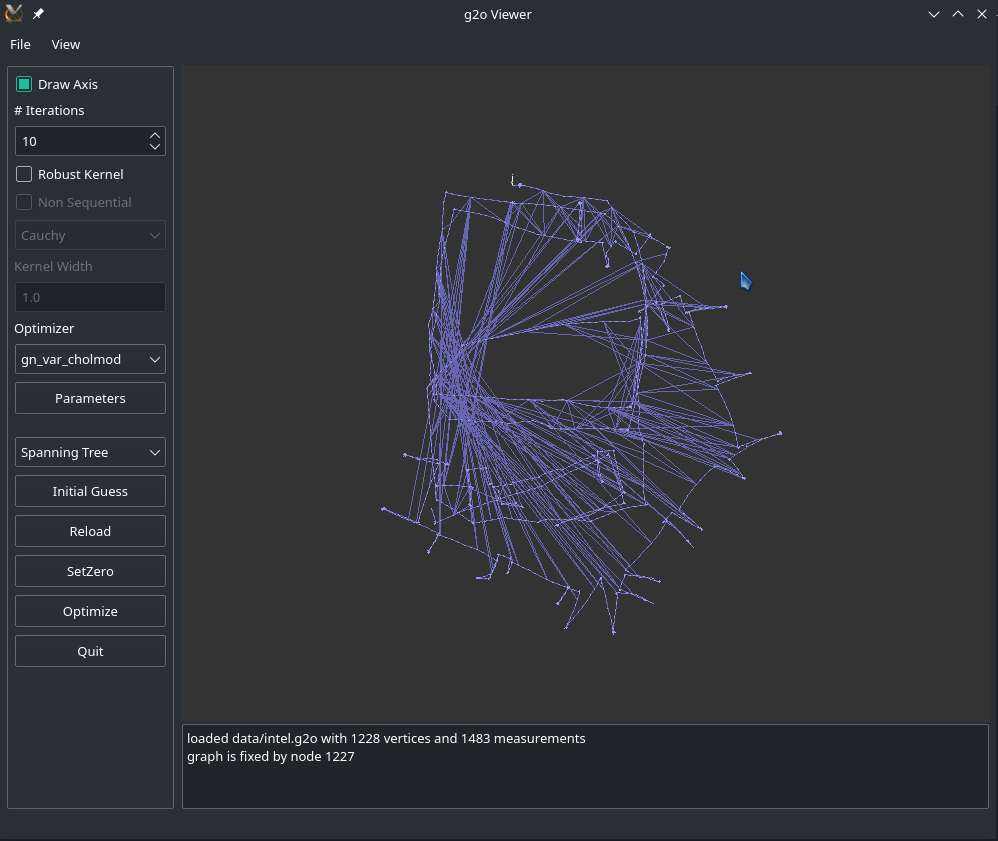

2. Initial guess

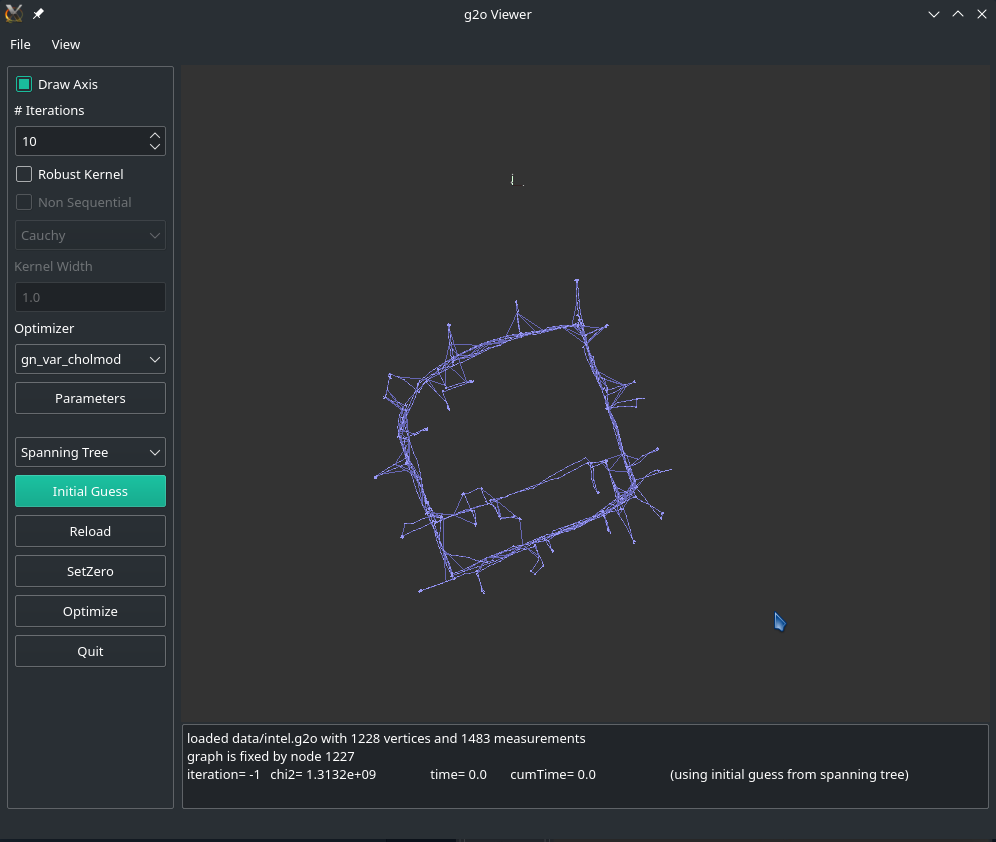

3. Final poses after optimization. Gauss Newton with no kernel used for 7 iterations by which point it converges.

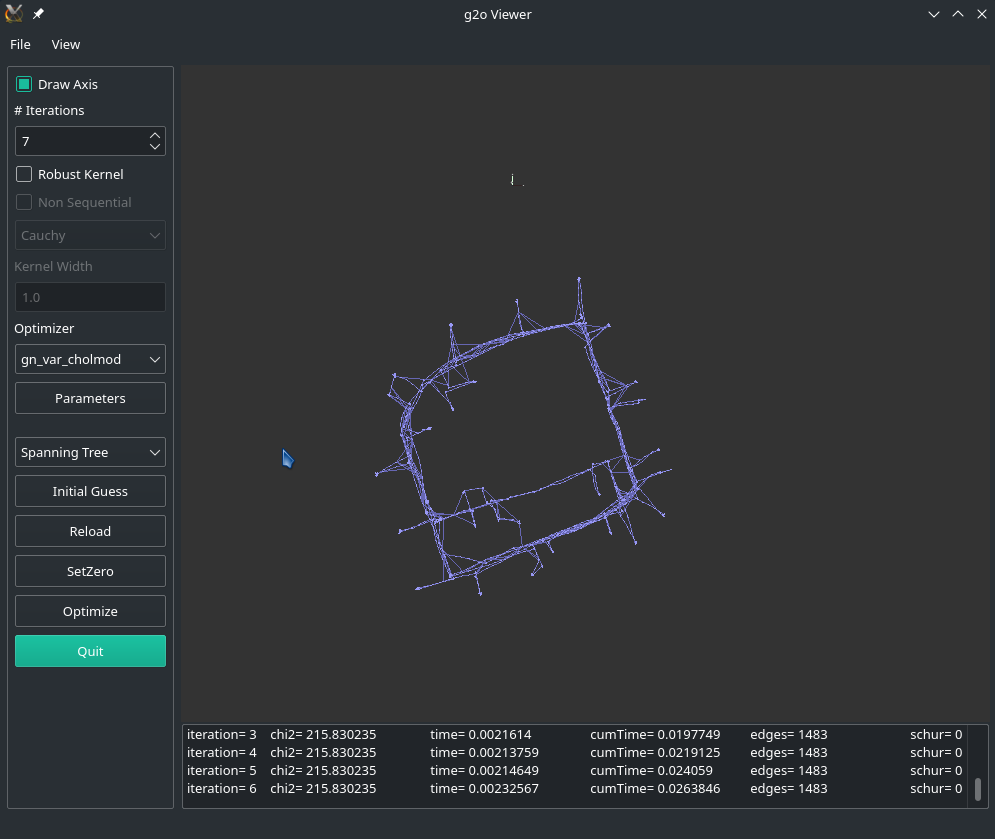

#### Sphere

1. Given Poses

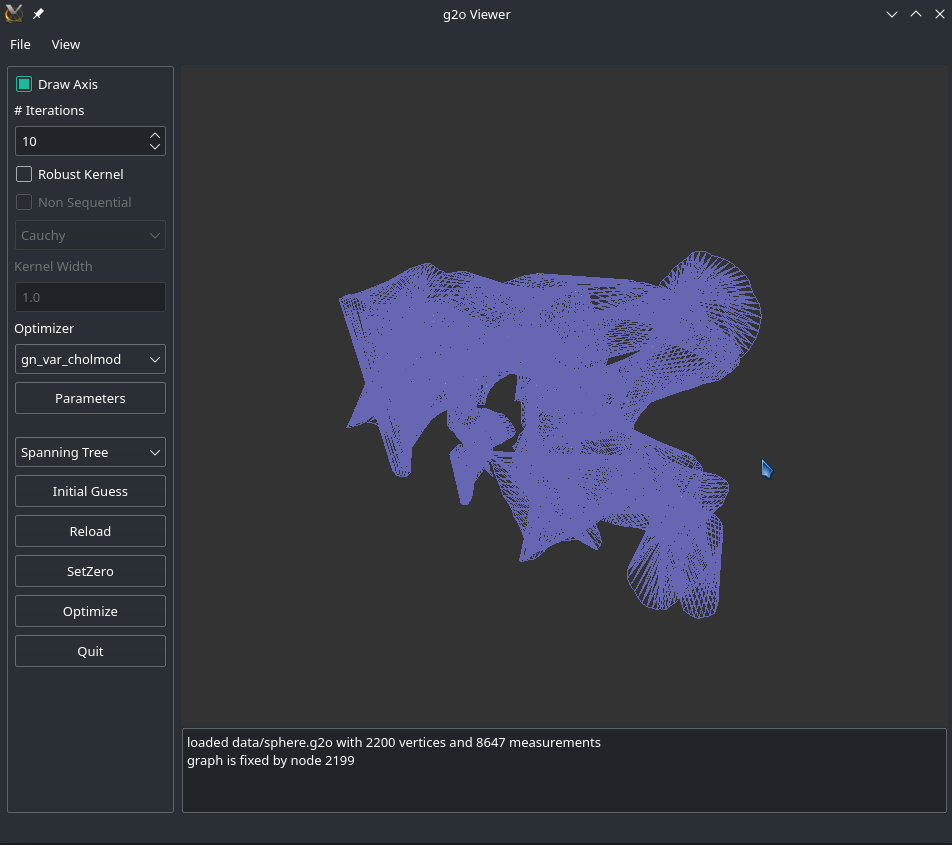

2. Initial Guess

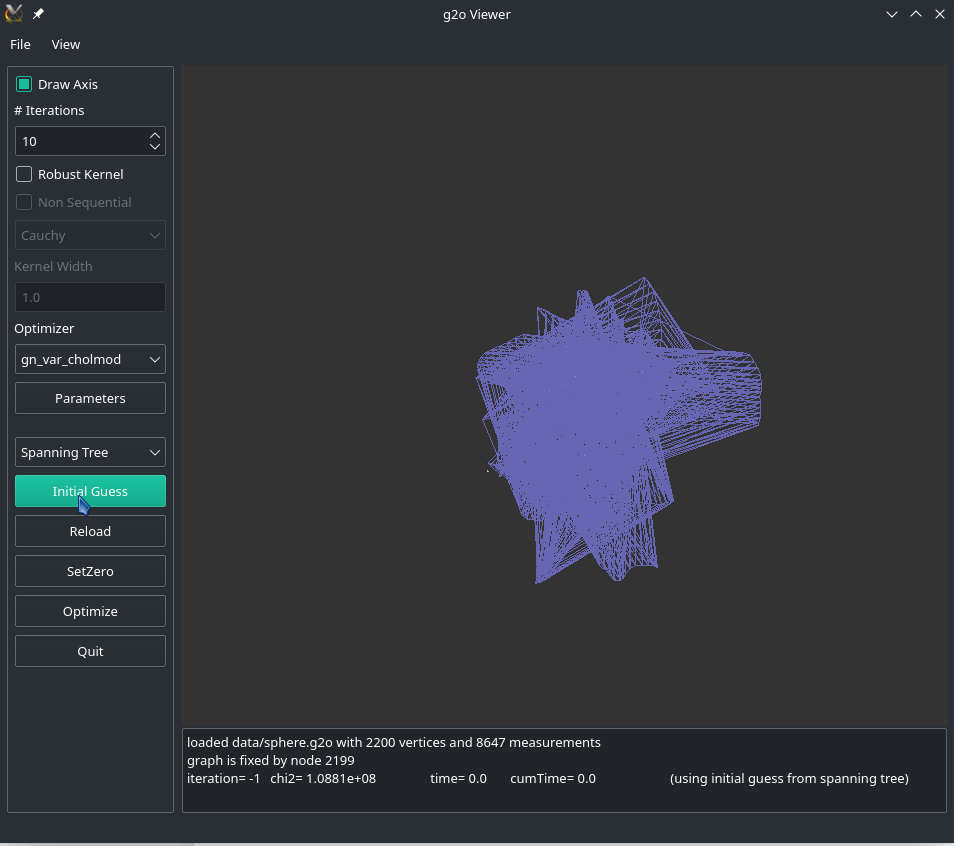

3. Result after 100 iterations of Gauss Newton without kernel. We can see that the sphere is still not perfect. Chi score reduced to 8.2 * 1e6 from 1.02 *1e8.

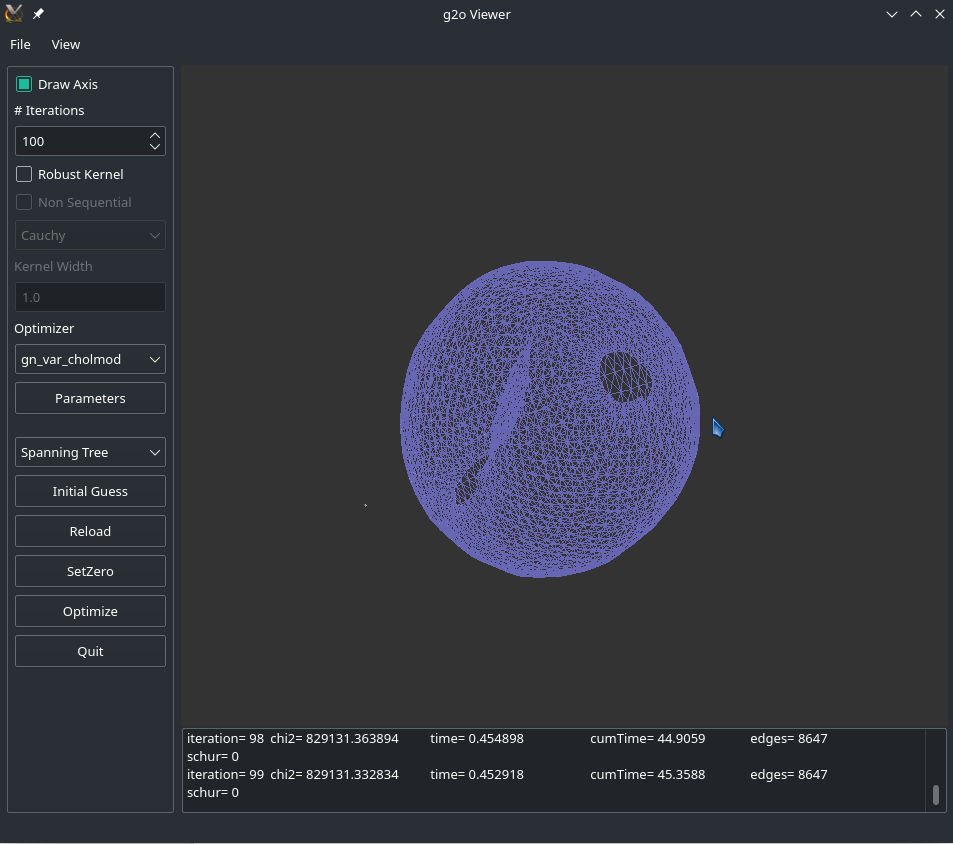

4. Final Result - Result after 100 iterations of Gauss Newton with Robust Kernel with width of 10. We can see that the obtained sphere is much better and the chi score is lower at 4.7 * 1e5.

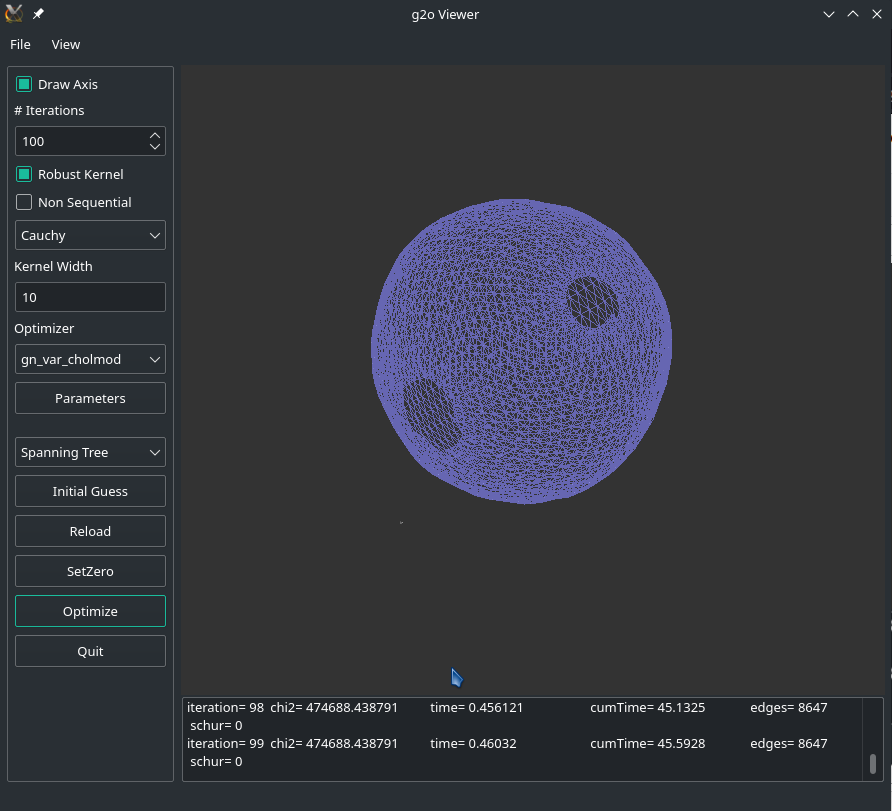

Observations and Options - 

1. The Robust Kernel option is highly useful in non-linear and complex paths.
2. There ar several kinds of optimizers available such as Gauss Newton, LM, DL etc. with different configurations such as sparse/dense etc.
3. The kernels available also vary such as Cauchy, Huber etc.